In [1]:
!pip install -q requests
!pip install -q beautifulsoup4
!pip install -q lxml
!pip install -q gtts
!pip install -q pygame
!pip install -q pydub
!pip install -q nltk

In [12]:
import os
import requests
from bs4 import BeautifulSoup
from gtts import gTTS
from IPython.display import Audio
import io
from pydub import AudioSegment
import pandas as pd
import csv
from datetime import datetime
from IPython.display import HTML
import hashlib
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from collections import Counter
import re
import random

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def calculate_sha256(input_string):
    # Create a SHA-256 hash object
    sha256_hash = hashlib.sha256()

    # Update the hash object with the bytes representation of the input string
    sha256_hash.update(input_string.encode('utf-8'))

    # Get the hexadecimal representation of the hash
    sha256_result = sha256_hash.hexdigest()

    return sha256_result

# Example usage
input_string = "daaris ameen"
sha256_result = calculate_sha256(input_string)

print(f"Input String: {input_string}")
print(f"SHA-256 Hash: {sha256_result}")

Input String: daaris ameen
SHA-256 Hash: 30f28291c40b3cf723af3c9f5de456d54be2fe9c0413e23bf1d9f722d8e97503


In [ ]:
# https://myanimelist.net/topanime.php?limit=
# https://myanimelist.net/topanime.php?type=bypopularity&limit=

In [ ]:
rank = 0

# Open a CSV file in write mode
with open('anime_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Write the header row, including the new 'Season' column
    csv_writer.writerow(['Rank', 'Name', 'Category', 'Episodes', 'Start Year', 'End Year', 'Members', 'Anime Page', 'Season'])

    for i in range(0, 3000, 50):
        link = "https://myanimelist.net/topanime.php?limit="
        limit = str(i)
        url = link + limit

        # Make a GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract information based on the HTML structure
            anime_list = soup.find_all('tr', class_='ranking-list')

            for anime in anime_list:
                # Extracting relevant information
                name = anime.find('div', class_='detail').find('div', class_='di-ib').text.strip()

                h3_tag = anime.find('h3', class_='fl-l fs14 fw-b anime_ranking_h3')
                a_tag = h3_tag.find('a')
                anime_page = a_tag.get('href')
                html_link = f'<a href="{anime_page}" target="_blank">Open Webpage</a>'

                information = anime.find('div', class_='information').text.strip()

                # Splitting and cleaning the information
                lines = [line.strip() for line in information.split('\n') if line.strip()]
                episodes_info = lines[0].split(' ')
                category = episodes_info[0]

                if category not in ["TV", "Movie"]:
                  continue

                episodes = episodes_info[1][1:]

                # Extracting start year and month for seasons
                start_date = lines[1]
                start_date = start_date.split(' ')
                start_month = start_date[0]
                if(start_date[1] == '-'):
                  continue

                rank += 1
                season_year = int(start_date[1])

                year = lines[1].split(' - ')
                start_year = year[0]
                end_year = year[1] if len(year) > 1 else "Ongoing"

                members = int(lines[2].split(' ')[0].replace(',', ''))

                # Determine the season based on the start month
                if start_month in ['Jan', 'Feb', 'Mar']:
                    season = 'Winter'
                elif start_month in ['Apr', 'May', 'Jun']:
                    season = 'Spring'
                elif start_month in ['Jul', 'Aug', 'Sep']:
                    season = 'Summer'
                elif start_month in ['Oct', 'Nov', 'Dec']:
                    season = 'Fall'
                else:
                    season = 'Unknown'

                # Write the data to the CSV file
                csv_writer.writerow([rank, name, category, episodes, start_year, end_year, members, HTML(html_link), f"{season} {season_year}"])

        else:
            print(f"Failed to retrieve the page. Status code: {response.status_code}")

print("Data saved to anime_data.csv")


Data saved to anime_data.csv


In [ ]:
data = pd.read_csv("anime_data.csv")
data.head()

Rank                                Name Category Episodes  Start Year  \
0     1                   Sousou no Frieren       TV       28  Sep 2023 -   
1     2    Fullmetal Alchemist: Brotherhood       TV       64    Apr 2009   
2     3                         Steins;Gate       TV       24    Apr 2011   
3     4                            Gintama°       TV       51    Apr 2015   
4     5  Shingeki no Kyojin Season 3 Part 2       TV       10    Apr 2019   

   End Year  Members                          Anime Page       Season  
0   Ongoing   360972  <IPython.core.display.HTML object>  Summer 2023  
1  Jul 2010  3265680  <IPython.core.display.HTML object>  Spring 2009  
2  Sep 2011  2507647  <IPython.core.display.HTML object>  Spring 2011  
3  Mar 2016   615375  <IPython.core.display.HTML object>  Spring 2015  
4  Jul 2019  2198331  <IPython.core.display.HTML object>  Spring 2019

In [ ]:
filtered_data = data[data['Season'].str.contains('Fall 2023', na=False)]
filtered_data.head()

Rank                                               Name Category  \
44     45                             Kusuriya no Hitorigoto       TV   
97     98    Kage no Jitsuryokusha ni Naritakute! 2nd Season       TV   
147   148                        Dr. Stone: New World Part 2       TV   
314   315                              Spy x Family Season 2       TV   
517   518  Shangri-La Frontier: Kusoge Hunter, Kamige ni ...       TV   

    Episodes  Start Year  End Year  Members  \
44        24  Oct 2023 -   Ongoing   166230   
97        12    Oct 2023  Dec 2023   247254   
147       11    Oct 2023  Dec 2023   187407   
314       12    Oct 2023  Dec 2023   354668   
517       25  Oct 2023 -   Ongoing   139585   

                             Anime Page     Season  
44   <IPython.core.display.HTML object>  Fall 2023  
97   <IPython.core.display.HTML object>  Fall 2023  
147  <IPython.core.display.HTML object>  Fall 2023  
314  <IPython.core.display.HTML object>  Fall 2023  
517  <IPython.core.display.HTML object>  Fall 2023

In [ ]:
filtered_data = data[data['Category'].str.contains('Movie', na=False)]
filtered_data.head()

Rank                                               Name Category Episodes  \
6      7                                 Gintama: The Final    Movie        1   
16    17                                     Koe no Katachi    Movie        1   
18    19  Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...    Movie        1   
23    24                            Violet Evergarden Movie    Movie        1   
24    25                                     Kimi no Na wa.    Movie        1   

   Start Year  End Year  Members                          Anime Page  \
6    Jan 2021  Jan 2021   142646  <IPython.core.display.HTML object>   
16   Sep 2016  Sep 2016  2264648  <IPython.core.display.HTML object>   
18   Jul 2013  Jul 2013   235922  <IPython.core.display.HTML object>   
23   Sep 2020  Sep 2020   581524  <IPython.core.display.HTML object>   
24   Aug 2016  Aug 2016  2674258  <IPython.core.display.HTML object>   

         Season  
6   Winter 2021  
16  Summer 2016  
18  Summer 2013  
23  Summer 2020  
24  Summer 2016

In [ ]:
filtered_data = data[(data['Season'].str.contains('Fall 2023', na=False)) & (data['Name'] == 'Sousou no Frieren')]
filtered_data.head()


Empty DataFrame
Columns: [Rank, Name, Category, Episodes, Start Year, End Year, Members, Anime Page, Season]
Index: []

In [3]:
import requests
from bs4 import BeautifulSoup

# url = anime_page
url = "https://myanimelist.net/anime/52991/Sousou_no_Frieren?q=Sousou%20no%20Frieren&cat=anime"

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract character names and voice actors
    actors = soup.find_all('div', class_='detail-characters-list clearfix')

    # Print the table header
    print("Character_Name | Role | Voice_Actor")

    # Iterate over each actor entry and print the table values
    for actor_value in actors:
        text = ' '.join(actor_value.stripped_strings)

        # Split the sentence by space
        words = text.split()

        # Iterate over pairs of words and print the table values
        for i in range(0, len(words), 6):
            character_name = words[i]
            if (words[i + 1][0]==','):
              character_name = character_name + words[i + 1]
              role = words[i + 2]
              voice_actor = ' '.join(words[i + 3:i + 4])

            else:
              role = words[i + 1]
              voice_actor = ' '.join(words[i + 2:i + 4])


            # Print or use the extracted information
            print(f"{character_name} | {role} | {voice_actor}")

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Character_Name | Role | Voice_Actor
Frieren | Main | Tanezaki, Atsumi
Main | Ichinose, | Kana Japanese
Kobayashi, | Chiaki | Japanese Himmel
Nobuhiko | Japanese | Eisen Supporting
Japanese | Heiter | Supporting Touchi,
Flamme | Supporting | Tanaka, Atsuko
Supporting | Taketatsu, | Ayana Japanese
Nakamura, | Yuuichi | Japanese Linie
Manaka | Japanese | 
Fukushi, | Yuuichirou | Producer Iwasa,
Itou, | Yuukou | Producer Kikuchi,


In [ ]:
# url = anime_page
url = "https://myanimelist.net/anime/52991/Sousou_no_Frieren?q=Sousou%20no%20Frieren&cat=anime"

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extracting synopsis
    synopsis = soup.find('p', itemprop='description').text.strip()

    # Extracting relevant information
    information_values = soup.find_all('div', class_='spaceit_pad')

    # Initialize variables
    Episodes = Japanese = English = Status = Premiered = Producers = Licensors = Studios = Source = Genres = Theme = Demographic = Rating = Score = Ranked = Popularity = Members = Favourites = ""

    # Iterate over each information value and assign values to variables
    for info_value in information_values:
        text = ' '.join(info_value.stripped_strings)

        # Check if the line contains a colon
        if ':' in text:
            key, value = [item.strip() for item in text.split(':', 1)]

            if key == 'Episodes':
                Episodes = value
            elif key == 'Japanese':
                Japanese = value
            elif key == 'English':
                English = value
            elif key == 'Status':
                Status = value
            elif key == 'Premiered':
                Premiered = value
            elif key == 'Producers':
                Producers = value
            elif key == 'Licensors':
                Licensors = value
            elif key == 'Studios':
                Studios = value
            elif key == 'Source':
                Source = value
            elif key == 'Genres':
                Genres = value
            elif key == 'Themes':
                Theme = value
            elif key == 'Demographic':
                Demographic = value
            elif key == 'Rating':
                Rating = value
            elif key == 'Score':
                Score = value
            elif key == 'Ranked':
                Ranked = value
            elif key == 'Popularity':
                Popularity = value
            elif key == 'Members':
                Members = value
            elif key == 'Favorites':
                Favourites = value

    # Print or use the extracted information
    print(f"Synopsis: {synopsis}")
    print(f"Episodes: {Episodes}")
    print(f"Japanese: {Japanese}")
    print(f"English: {English}")
    print(f"Status: {Status}")
    print(f"Premiered: {Premiered}")
    print(f"Producers: {Producers}")
    print(f"Licensors: {Licensors}")
    print(f"Studios: {Studios}")
    print(f"Source: {Source}")
    print(f"Genres: {Genres}")
    print(f"Themes: {Theme}")
    print(f"Demographic: {Demographic}")
    print(f"Rating: {Rating}")
    print(f"Score: {Score}")
    print(f"Ranked: {Ranked}")
    print(f"Popularity: {Popularity}")
    print(f"Members: {Members}")
    print(f"Favourites: {Favourites}")

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Synopsis: During their decade-long quest to defeat the Demon King, the members of the hero's party—Himmel himself, the priest Heiter, the dwarf warrior Eisen, and the elven mage Frieren—forge bonds through adventures and battles, creating unforgettable precious memories for most of them.

However, the time that Frieren spends with her comrades is equivalent to merely a fraction of her life, which has lasted over a thousand years. When the party disbands after their victory, Frieren casually returns to her "usual" routine of collecting spells across the continent. Due to her different sense of time, she seemingly holds no strong feelings toward the experiences she went through.

As the years pass, Frieren gradually realizes how her days in the hero's party truly impacted her. Witnessing the deaths of two of her former companions, Frieren begins to regret having taken their presence for granted; she vows to better understand humans and create real personal connections. Although the story

In [ ]:
# anime_name
# synopsis
# genre
# studios
# imdb_score
# myanimelist_score
# ep
# premiered
# other_works
# novel_writer
# illustrator
# manga_writer
# chap1
# vol1
# chap2
# vol2

In [ ]:
# Anime Planet
# watching_count: https://www.anime-planet.com/anime/seasons/fall-2023?sort=status_2
# watched_count: https://www.anime-planet.com/anime/seasons/fall-2023?sort=status_1
# droped_count: https://www.anime-planet.com/anime/seasons/fall-2023?sort=status_3
# average_rating: https://www.anime-planet.com/anime/seasons/fall-2023?sort=rank

# Shangri-La Frontier

In [21]:
def text_to_speech(text, language='en', output_file='output.mp3'):

    tts = gTTS(text=text, lang=language, slow=False)
    tts.save(output_file)
    audio = AudioSegment.from_file(output_file, format="mp3")
    audio.speedup(playback_speed=1.1).export(output_file, format="mp3")
    leng = get_audio_length(output_file)
    print(leng)
    print(f"Text-to-speech conversion completed. Saved as {output_file}")
    length.append(leng)
    return output_file

def play_audio(file_path):
    with open(file_path, 'rb') as f:
        audio = Audio(data=f.read(), autoplay=True)
    return audio

def combine_mp3_files(file_list, output_file='output.mp3'):
    combined = AudioSegment.silent(duration=0)
    for file in file_list:
        sound = AudioSegment.from_mp3(file)
        combined += sound
        if(file == "output_1.mp3" or file == "output_2.mp3" or file == "output_4.mp3" or file == "output_7.mp3"):
          combined += AudioSegment.silent(duration=500)
    combined.export(output_file, format="mp3")
    print(f"MP3 files combined successfully. Saved as {output_file}")
    leng = get_audio_length(output_file)
    length.append(leng)
    return output_file

def get_audio_length(file_path):
    audio = AudioSegment.from_file(file_path, format="mp3")
    return audio.duration_seconds

# text0 = "Please wear headphone for good audio and don't forget to turn on subtitle."

anime_name = "Shangri-La Frontier"
text1 = "Yo fam, what's up! Welcome back to my channel! Today we're diving into the world of " + anime_name +", and I've got all the juicy deets for you. So let's jump right into it! "

synopsis = "Rakuro Hizutome a high school student, loves playing trash VR games and smashing them. He decides to try a new super cool VR game called Shangri-La Frontier. Instead of going through the game’s prologue, he dives right into the action. Rakuro, also known as Sunraku in the game, encounters an old rival, who changes game setting completely. Wearing only shorts and a bird mask, Sunraku faces different creatures in the game and does well until he meets... Sorry no more spoilers guys!"
text2 = "Alright, so here's the scoop on this anime. "+synopsis

genre = "Action, Adventure and Fantasy"+"."
demographic = "Shounen"
text3 = "For Genres? It involves "+genre+" And it's demography comes under " + demographic + " type. "

studios = "C2C Studios"
text4 = studios+" was behind this one. "

imdb_score = "7.7"
myanimelist_score = "7.9"
text5 = "And let me tell you, it's got some solid scores of "+imdb_score+" on IMDb, and "+myanimelist_score+" on MyAnimeList."

ep = "25"
premiered = "Fall 2023"
text6 = "It's a "+ep+"-episode rollercoaster, that dropped in "+premiered+". "

graphics = "9"
char_acting = "8"
text6_1 = "Now, if you're into crisp graphics, I'd give it an "+graphics+" points. And for character acting? Another solid "+char_acting+". "


other_works = "Tsukimichi" + ", " + "WorldEnd: What do you do at the end of the world?" + ", and " + "Wandering Witch"
text7="The mastermind "+studios+" were also behind production of "+other_works+". "

novel_writer = ""
illustrator = "Fuji Ryousuke"
manga_writer = "Katarina"
chap1 = "158 plus"
vol1 = "14 plus"
chap2 = ""
vol2 = ""

# text8 = "This Anime got its origin from light novel whose author is "+novel_writer+", and he has pulished "+chap1+" chapters in "+vol1+" volumes. Before coming to anime, "+anime_name+" got manga adaptation whose illustrator is "+illustrator+", and he has pulished "+chap2+" chapters in "+vol2+" volumes."

text8 = "And let's not forget our manga maestro, "+manga_writer+", and his illustrator is "+illustrator+", These guys behind the scenes bringing us "+ chap1 + " chapters across " + vol1 + " volumes. "
# text8 = "And let's not forget our manga maestro, "+manga_writer+", The guys behind the scenes, bringing us "+ chap1 + "+ chapters across " + vol1 + "+ volumes. "
# other_manga_works = "raven of inner palace" + ", " + "story of saiunkoku" + ",and " + "young black jack"+"."
# text8_1 = "Other works of "+manga_writer+" include "+other_works+"."

similar_works = "New Gate" + ", " + "Hack" + ", and " + "Playthrough of a Certain Dude's VRMMO Life"+". "
text9 = "If you're a fan of this anime and enjoyed it, then I have few other recommendations , "+similar_works

similar_manga_works = "Blade Skill Online" + ", " + "Retire Shita Ningyoushi" + ", and " + "Sword Art Online"+". "
text9_1 = "If you dig-in for other mangas similar to "+anime_name+", then check out, "+similar_manga_works

text10 = "Thanks a bunch for watching this video! Your support seriously means the world. Consider hitting that sub button, no pressure just good vibes. And drop a comment! Is this anime a thumbs-up or a pass? Let's help each other out. Lemme know what other anime you're curious about, and remember I'm here every Sunday with fresh content. Catch you later Guys! Take care!"

strings = [
    text1,
    text2,
    text3,
    text4,
    text5,
    text6,
    text6_1,
    text7,
    text8,
    text9,
    text9_1,
    text10
]
length = []
mp3_files = [text_to_speech(s, output_file=f"output_{i+1}.mp3") for i, s in enumerate(strings)]
output_file = combine_mp3_files(mp3_files, 'output.mp3')

#DELETE UNECESSARY FILES
for i in range(1, 13):
  file_path = os.path.join("", f"output_{i}.mp3")
  os.remove(file_path)
  print(f"File {file_path} deleted successfully.")
s

11.57
Text-to-speech conversion completed. Saved as output_1.mp3
36.626
Text-to-speech conversion completed. Saved as output_2.mp3
7.31
Text-to-speech conversion completed. Saved as output_3.mp3
3.017
Text-to-speech conversion completed. Saved as output_4.mp3
7.85
Text-to-speech conversion completed. Saved as output_5.mp3
5.24
Text-to-speech conversion completed. Saved as output_6.mp3
7.769
Text-to-speech conversion completed. Saved as output_7.mp3
10.217
Text-to-speech conversion completed. Saved as output_8.mp3
13.181
Text-to-speech conversion completed. Saved as output_9.mp3
10.451
Text-to-speech conversion completed. Saved as output_10.mp3
10.064
Text-to-speech conversion completed. Saved as output_11.mp3
23.933
Text-to-speech conversion completed. Saved as output_12.mp3
MP3 files combined successfully. Saved as output.mp3
File output_1.mp3 deleted successfully.
File output_2.mp3 deleted successfully.
File output_3.mp3 deleted successfully.
File output_4.mp3 deleted successfully.
F

In [27]:
play_audio(output_file)

In [26]:
# VOICE - PITCH
# input_file = "output.mp3"
# output_file = "output_pitch.mp3"
# sound = AudioSegment.from_mp3(input_file)

# semitones = -0.25
# changed_sound = sound._spawn(sound.raw_data, overrides={
#     "frame_rate": int(sound.frame_rate * (2 ** (semitones / 12.0)))
# })

# changed_sound.export(output_file, format="mp3")
# audio = AudioSegment.from_file(output_file, format="mp3")
# audio.speedup(playback_speed=1.025).export(output_file, format="mp3")
# length[-1] = get_audio_length(output_file)
# play_audio(output_file)

################################################################################

# BGM
music = AudioSegment.from_mp3("piano.mp3")
volume_reduction_dB = 31

repetitions = 1
repeated_audio = music * repetitions
combined_audio = music + repeated_audio
combined_audio.export("piano_vol.mp3", format="mp3")

music = AudioSegment.from_mp3("piano_vol.mp3")
music = music - volume_reduction_dB
music_file = "piano_vol.mp3"
print(len(music), length[-1])
if(len(music)>=length[-1]*1000):
  desired_duration = length[-1]*1000
  music = music[:desired_duration]

music.export(music_file, format="mp3")
play_audio(music_file)

################################################################################

# VOICE + BGM
# file1_path = "output.mp3"
# audio1 = AudioSegment.from_file(file1_path, format="mp3")

# file2_path = "piano_vol.mp3"
# audio2 = AudioSegment.from_file(file2_path, format="mp3")

# audio1 = audio1.set_sample_width(max(audio1.sample_width, audio2.sample_width))
# audio1 = audio1.set_frame_rate(max(audio1.frame_rate, audio2.frame_rate))

# overlayed_audio = audio1.overlay(audio2)

# overlayed_output_file = "overlayed_output.mp3"
# overlayed_audio.export(overlayed_output_file, format="mp3")
# play_audio(overlayed_output_file)

287112 149.2275


In [ ]:
# Text used in the video - rough
text1+text2+text3+text4+text5+text6+text6_1+text7+text8+text9+text9_1+text10
# text1+text2+text3

"Yo fam, what's up! Welcome back to my channel! Today we're diving into the world of Shangri-La Frontier, and I've got all the juicy deets for you. So let's jump right into it! Alright, so here's the scoop on this anime. Rakuro Hizutome a high school student, loves playing trash VR games and smashing them. He decides to try a new super cool VR game called Shangri-La Frontier. Instead of going through the game’s prologue, he dives right into the action. Rakuro, also known as Sunraku in the game, encounters an old rival, who changes game setting completely. Wearing only shorts and a bird mask, Sunraku faces different creatures in the game and does well until he meets... Sorry no more spoilers guys!For Genres? It involves Action, Adventure and Fantasy. And it's demography comes under Shounen type. C2C Studios was behind this one. And let me tell you, it's got some solid scores of 7.7 on IMDb, and 7.9 on MyAnimeList.It's a 25-episode rollercoaster, that dropped in Fall 2023. Now, if you're

In [ ]:
print(round(length[0], 1))
print(round(length[1], 1))
print(round(length[2]+length[3], 1))
print(round(length[4]+length[5], 1))
print(round(length[6], 1))
print(round(length[7], 1))
print(round(length[8], 1))
print(round(length[9]+length[10], 1))
print("-------")
print(round(length[12], 1))

11.6
36.6
10.3
13.1
7.8
10.2
13.2
20.5
-------
149.3


In [ ]:
# VIDEO TITLE
title1 = "All You Need To Know About "+ anime_name +" | 13 Hot Topics Worth Exploring | Must Watch ❗❕❗ "+premiered
title2 = "All You Need To Know About "+ anime_name +" | 13 Hot Topics Worth Exploring | "+premiered
title3 = anime_name + ": 13 Hot Topics Worth Exploring - Before You Start Watching ❗❕❗ "+premiered
title4 = anime_name + ": 13 Hot Topics Worth Exploring - "+premiered+" Anime | Must Watch ❗"

print("Title 1\n"+title1+"\n"+str(len(title1)))
print("---------")
print("Title 2\n"+title2+"\n"+str(len(title2)))
print("---------")
print("Title 3\n"+title3+"\n"+str(len(title3)))
print("---------")
print("Title 4\n"+title4+"\n"+str(len(title4)))

Title 1
All You Need To Know About Shangri-La Frontier | 13 Hot Topics Worth Exploring | Must Watch ❗❕❗ Fall 2023
105
---------
Title 2
All You Need To Know About Shangri-La Frontier | 13 Hot Topics Worth Exploring | Fall 2023
90
---------
Title 3
Shangri-La Frontier: 13 Hot Topics Worth Exploring - Before You Start Watching ❗❕❗ Fall 2023
92
---------
Title 4
Shangri-La Frontier: 13 Hot Topics Worth Exploring - Fall 2023 Anime | Must Watch ❗
83


In [ ]:
# VIDEO DESCRIPTION
# ⛩️🌸🍥☯🍜
trailer = "https://www.youtube.com/results?search_query="+anime_name.replace(" ", "+")+"+trailer"
print("⛩️ **"+anime_name+"** ⛩️")
print("")
print("Trailer 🎥: "+ trailer)
print("")
print("Full Anime 🎬: https://www.crunchyroll.com/search?q="+anime_name.replace(" ", "%20"))
print("")
print("Buy Manga 📓: https://www.amazon.com/s?k="+anime_name.replace(" ", "+"))
print("")
print("                                                                                             🍥🍥🍥🍥🍥")
print("")
print("**Short Summary** 💖\n"+synopsis)
print("")
print("                                                                                             🍥🍥🍥🍥🍥")
print("")
print("Follow me on 👉 Instagram 📷: https://www.instagram.com/animeponder")
print("")
print("                                                                                             🍥🍥🍥🍥🍥")
print("")
print("Comment 💬 down whether "+anime_name+" is watchable or not 🤔")
print("")
print("                                                                                             🍥🍥🍥🍥🍥")
print("")
print("🌸 **Welcome to Anime Ponder!** 🌸 \n\n📌 About This Channel 📌\n\nAnime Ponder is your go-to destination for in-depth discussions, reviews, and insights into the captivating world of anime. Join us as we delve into the intricate details of "+ anime_name +" , exploring its characters, plot twists, and the essence that makes it an unforgettable experience.\n\n🍜 What to Expect 🍜\n\n🌈 Anime Data: Discover our honest and insightful data of "+ anime_name +" and other anime gems.\n\n🎙️ Thoughtful Discussions: Engage in thought-provoking discussions on the themes, characters, and memorable moments of  "+ anime_name +" .\n\n🎨 Fan Theories and Analysis: Uncover hidden meanings and theories that add a new layer to your favorite anime.\n\n🗓️ Release Updates: Stay tuned for the latest updates, news, and announcements related to "+ anime_name +" and upcoming anime releases.")
print("")
print("                                                                                             🍥🍥🍥🍥🍥")
print("")
print("Images are taken with permission from: https://in.pinterest.com/comicsocietynitt/_created")

⛩️ **Shangri-La Frontier** ⛩️

Trailer 🎥: https://www.youtube.com/results?search_query=Shangri-La+Frontier+trailer

Full Anime 🎬: https://www.crunchyroll.com/search?q=Shangri-La%20Frontier

Buy Manga 📓: https://www.amazon.com/s?k=Shangri-La+Frontier

                                                                                             🍥🍥🍥🍥🍥

**Short Summary** 💖
Rakuro Hizutome a high school student, loves playing trash VR games and smashing them. He decides to try a new super cool VR game called Shangri-La Frontier. Instead of going through the game’s prologue, he dives right into the action. Rakuro, also known as Sunraku in the game, encounters an old rival, who changes game setting completely. Wearing only shorts and a bird mask, Sunraku faces different creatures in the game and does well until he meets... Sorry no more spoilers guys!

                                                                                             🍥🍥🍥🍥🍥

Follow me on 👉 Instagram 📷: https://www.ins

In [ ]:
# TAGS
def remove_special_characters(input_string):
    cleaned_string = re.sub(r'[^a-zA-Z\s]', '', input_string)
    return cleaned_string

def remove_common_words(input_string):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(input_string)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    result_string = ' '.join(filtered_words)
    return result_string

def get_top_unique_words(input_string, top_n=10):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(input_string.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    word_frequency = Counter(filtered_words)
    top_unique_words = [word for word, _ in word_frequency.most_common(top_n)]
    return top_unique_words

def remove_verbs(input_string):
    words = word_tokenize(input_string)
    tagged_words = pos_tag(words)
    verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    filtered_words = [word for word, tag in tagged_words if tag not in verb_tags]
    result_string = ' '.join(filtered_words)
    return result_string

def get_nouns(input_string):
    words = word_tokenize(input_string)
    tagged_words = pos_tag(words)
    noun_tags = ['NN', 'NNS']
    filtered_words = [word for word, tag in tagged_words if tag in noun_tags]
    result_string = ' '.join(filtered_words)
    return result_string


input_string = synopsis
input_string = remove_special_characters(input_string)
input_string = remove_common_words(input_string)
input_string1 = remove_verbs(input_string)
input_string2 = get_nouns(input_string)

additional_tags = "Anime Review, Best anime, Anime, anime weebs, fall 2023, fall anime, anime trailer, manga, "+anime_name
result1 = get_top_unique_words(input_string1, top_n=30)
result2 = get_top_unique_words(input_string2, top_n=30)
result3 = get_top_unique_words(input_string2, top_n=30)+get_top_unique_words(input_string2, top_n=30)

print("TAGS1")
print(', '.join(result1))
print("")
print("TAGS2")
print(', '.join(result2))
print("")
print("TAGS3")
print(additional_tags)
print("")
print("TAGS1+TAGS2+TAGS3")
print(', '.join(result3)+", "+additional_tags)

result = ', '.join(result3)+", "+additional_tags
sum=0
for i in result:
  sum+=len(i)
print(sum)


TAGS1
game, rakuro, vr, games, sunraku, hizutome, high, school, student, trash, decides, new, super, cool, shangrila, frontier, instead, dives, right, action, also, encounters, old, rival, changes, completely, shorts, bird, mask, different

TAGS2
game, games, school, student, decides, cool, dives, action, encounters, changes, shorts, bird, mask, creatures, spoilers, guys

TAGS3
Anime Review, Best anime, Anime, anime weebs, fall 2023, fall anime, anime trailer, manga, Shangri-La Frontier

TAGS1+TAGS2+TAGS3
game, games, school, student, decides, cool, dives, action, encounters, changes, shorts, bird, mask, creatures, spoilers, guys, game, games, school, student, decides, cool, dives, action, encounters, changes, shorts, bird, mask, creatures, spoilers, guys, Anime Review, Best anime, Anime, anime weebs, fall 2023, fall anime, anime trailer, manga, Shangri-La Frontier
366


In [ ]:
# Text used in the video - well formated

print("About "+anime_name+":\n"+text1+text2+"\n\nGenre & Demography:\n"+text3+"\n\nStudio & Ratings:\n"+text4+text5+text6_1+"\n\nEpisodes and Season:\n"+text6+"\n\nStudio's Other Works:\n"+text7+"\n\nManga Info:\n"+text8+"\n\nSimilar Other Anime:\n"+text9+"\n\nSimilar Other Manga:\n"+text9_1+"\n\nVote of Thanks:\n"+text10)

About Shangri-La Frontier:
Yo fam, what's up! Welcome back to my channel! Today we're diving into the world of Shangri-La Frontier, and I've got all the juicy deets for you. So let's jump right into it! Alright, so here's the scoop on this anime. Rakuro Hizutome a high school student, loves playing trash VR games and smashing them. He decides to try a new super cool VR game called Shangri-La Frontier. Instead of going through the game’s prologue, he dives right into the action. Rakuro, also known as Sunraku in the game, encounters an old rival, who changes game setting completely. Wearing only shorts and a bird mask, Sunraku faces different creatures in the game and does well until he meets... Sorry no more spoilers guys!

Genre & Demography:
For Genres? It involves Action, Adventure and Fantasy. And it's demography comes under Shounen type. 

Studio & Ratings:
C2C Studios was behind this one. And let me tell you, it's got some solid scores of 7.7 on IMDb, and 7.9 on MyAnimeList.Now, i

In [ ]:
print("PINTREST: https://in.pinterest.com/search/pins/?q="+anime_name.replace(" ", "%20"))
print("MANGAREADER: https://mangareader.to/search?keyword="+anime_name.replace(" ", "+"))

PINTREST: https://in.pinterest.com/search/pins/?q=Shangri-La%20Frontier
MANGAREADER: https://mangareader.to/search?keyword=Shangri-La+Frontier


In [ ]:
def convert_html_to_python(variables={}, code=""):
    for variable in variables:
        code = code.replace("{{"+str(variable)+"}}", variables[variable])
    return code

some_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        /* Add your CSS styles here */
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            line-height: 1.6;
        }

        h1 {
            color: #3366cc;
        }

        h2 {
            color: #cc3366;
        }

        p {
            color: #333;
        }

        /* Add more styles as needed */
    </style>
    <title>{{anime_name}} - Anime Details</title>
</head>
<body>

    <h1>About {{anime_name}}</h1>
    <p>{{text1}} {{text2}}</p>

    <h2>Genre & Demography</h2>
    <p>{{text3}}</p>

    <h2>Studio & Ratings</h2>
    <p>{{text4}} {{text5}} {{text6_1}}</p>

    <h2>Episodes and Season</h2>
    <p>{{text6}}</p>

    <h2>Studio's Other Works</h2>
    <p>{{text7}}</p>

    <h2>Manga Info</h2>
    <p>{{text8}}</p>

    <h2>Similar Other Anime</h2>
    <p>{{text9}}</p>

    <h2>Similar Other Manga</h2>
    <p>{{text9_1}}</p>

    <h2>Vote of Thanks</h2>
    <p>{{text10}}</p>

</body>
</html>
"""

html_code = convert_html_to_python({"anime_name":anime_name, "text1":text1, "text1":text1, "text2":text2, "text3":text3, "text4":text4, "text5":text5, "text6":text6, "text6_1":text6_1, "text7":text7, "text8":text8, "text9":text9, "text9_1":text9_1, "text10":text10}, some_code)

with open("anime_details.html", "w", encoding="utf-8") as html_file:
    html_file.write(html_code)
print("code executed successfully")

code executed successfully


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Perceptron, SGDRegressor,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.feature_selection import SelectKBest, f_regression, RFE

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV

import pickle


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## LOAD MODEL

In [ ]:
# with open('model.pkl','rb') as file:
#     dr = pickle.load(file)

## READ DATA

In [ ]:
sample = pd.read_csv("sample.csv")
sample

In [ ]:
data = pd.read_csv("train.csv")
data.head()

In [ ]:
data[data['passenger_count'] == 0].head()

In [ ]:
data[data['trip_distance'] == 0].head()

In [ ]:
data[data['tpep_pickup_datetime'] == data['tpep_dropoff_datetime']].head()

## FEATURE ENGINEERING

In [ ]:
data= data.replace(np.nan,method='ffill')

                                ########################
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data['RatecodeID'] = data['RatecodeID'].apply(lambda x: 1 if x == 99 else x)
data['duration'] = abs((data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']))
data['duration'] = data['duration'].dt.total_seconds().div(60).astype(float)
data['misc'] = data['tip_amount'] + data['tolls_amount'] + data['extra'] + data['Airport_fee'] + data['improvement_surcharge'] + data['congestion_surcharge']
data['locdiff'] = (data['DOLocationID'] - (data['PULocationID']))

                                ########################

data['week'] = data['tpep_pickup_datetime'].dt.dayofweek
conditions = [
    (data['week'] == 2),  # Tuesday
    (data['week'] == 3),  # Wednesday
    (data['week'] == 4),  # Thursday
    (data['week'] == 5)   # Friday
]
values = [1, 2, 3, 4]
data['week'] = np.select(conditions, values, default=5)

                                ########################

data['day'] = data['tpep_pickup_datetime'].dt.day
conditions = [
    (data['day'] == 1),
    (data['day'] == 28),
    (data['day'] == 29),
    (data['day'] == 30)
]
values = [1, 2, 3, 4]
data['day'] = np.select(conditions, values, default=5)

                                ########################

data['pick_hour'] = data['tpep_pickup_datetime'].dt.hour
conditions = [
    (data['pick_hour'] >= 6) & (data['pick_hour'] < 12),
    (data['pick_hour'] >= 12) & (data['pick_hour'] < 18),
    (data['pick_hour'] >= 18) & (data['pick_hour'] < 24),
    (data['pick_hour'] >= 0) & (data['pick_hour'] < 6)
]
values = [1, 2, 3, 4]
data['pick_shift'] = np.select(conditions, values, default=5)

data['drop_hour'] = data['tpep_dropoff_datetime'].dt.hour
conditions = [
    (data['drop_hour'] >= 6) & (data['drop_hour'] < 12),
    (data['drop_hour'] >= 12) & (data['drop_hour'] < 18),
    (data['drop_hour'] >= 18) & (data['drop_hour'] < 24),
    (data['drop_hour'] >= 0) & (data['drop_hour'] < 6)
]
values = [1, 2, 3, 4]
data['drop_shift'] = np.select(conditions, values, default=5)

                                ########################
conditions = [
    (data['PULocationID'] >= 1) & (data['PULocationID'] < 66),
    (data['PULocationID'] >= 66) & (data['PULocationID'] < 132),
    (data['PULocationID'] >= 132) & (data['PULocationID'] < 198),
    (data['PULocationID'] >= 198) & (data['PULocationID'] <= 264)
]
values = [1, 2, 3, 4]
data['pu_cycle'] = np.select(conditions, values, default=5)
conditions = [
    (data['DOLocationID'] >= 1) & (data['DOLocationID'] < 66),
    (data['DOLocationID'] >= 66) & (data['DOLocationID'] < 132),
    (data['DOLocationID'] >= 132) & (data['DOLocationID'] < 198),
    (data['DOLocationID'] >= 198) & (data['DOLocationID'] <= 264)
]
values = [1, 2, 3, 4]
data['do_cycle'] = np.select(conditions, values, default=5)

                                ########################

data['speed'] = data.apply(lambda row: 0 if row['duration'] == 0 else row['trip_distance'] / row['duration'], axis=1)

                                ########################

data['passn_check'] = data['passenger_count'].apply(lambda x: 0 if x == 0 else 1)
data['tripd_check'] = data['trip_distance'].apply(lambda x: 0 if x == 0 else 1)
data['sp_check'] = data['speed'].apply(lambda x: 0 if x == 0 else 1)
data['dur_check'] = data['duration'].apply(lambda x: 0 if x == 0 else 1)
data['ext_check'] = data['extra'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['tip_check'] = data['tip_amount'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['tolls_check'] = data['tolls_amount'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['airp_check'] = data['Airport_fee'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['misc_check'] = data['misc'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['loc_check'] = data['locdiff'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)

                                ########################

data= data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'],axis=1) # no use now
# data= data.drop(['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'],axis=1) # misc takes of it


## EDA

In [ ]:
print(data['VendorID'].value_counts())
print(" ")
print(data['passenger_count'].value_counts())
print(" ")
print(data['RatecodeID'].value_counts())
print(" ")
print(data['store_and_fwd_flag'].value_counts())
print(" ")
print(data['payment_type'].value_counts())
print(" ")
print(data['improvement_surcharge'].value_counts())
print(" ")
print(data['congestion_surcharge'].value_counts())
print(" ")
print(data['week'].value_counts())
print(" ")
print(data['day'].value_counts())
print(" ")
print(data['pick_shift'].value_counts())
print(" ")
print(data['drop_shift'].value_counts())
print(" ")
print(data['passn_check'].value_counts())
print(" ")
print(data['tripd_check'].value_counts())
print(" ")
print(data['sp_check'].value_counts())
print(" ")
print(data['dur_check'].value_counts())
print(" ")
print(data['loc_check'].value_counts())
print(" ")
print(data['pu_cycle'].value_counts())
print(" ")
print(data['do_cycle'].value_counts())

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
(data.isnull().sum())


In [ ]:
sns.set()

In [ ]:
data.hist(bins=50,figsize=(20,20))
plt.show()


In [ ]:
average_demand_by_day = data.groupby('day')['total_amount'].mean()
average_demand_by_day = average_demand_by_day.reset_index()
average_demand_by_day.columns = ['day', 'average_demand']
print(average_demand_by_day)

In [ ]:
average_demand_by_day = data.groupby('week')['total_amount'].mean()
average_demand_by_day = average_demand_by_day.reset_index()
average_demand_by_day.columns = ['week', 'average_demand']
print(average_demand_by_day)

In [ ]:
average_demand_by_day = data.groupby('pick_shift')['total_amount'].mean()
average_demand_by_day = average_demand_by_day.reset_index()
average_demand_by_day.columns = ['pick_shift', 'average_demand']
print(average_demand_by_day)

average_demand_by_day = data.groupby('drop_shift')['total_amount'].mean()
average_demand_by_day = average_demand_by_day.reset_index()
average_demand_by_day.columns = ['drop_shift', 'average_demand']
print(average_demand_by_day)

In [ ]:
cat_col = d

In [ ]:
cat_col = data.select_dtypes(include=['object'])

num_col = data.select_dtypes(exclude=['object'])


In [ ]:
cat_col.head()

In [ ]:
num_col.head()

In [ ]:
exploration_set = num_col.copy()
sns.scatterplot(x='extra', y='tip_amount', hue='total_amount',
                data=exploration_set)

In [ ]:
exploration_set.plot(kind='scatter', x='locdiff', y='duration', alpha=0.5,
                     c="total_amount", cmap=plt.get_cmap("jet"))

In [ ]:
corr_matrix = exploration_set.corr()

In [ ]:
corr_matrix['total_amount']

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
num_col_names = num_col.columns.tolist()
print(num_col_names)

In [ ]:
cat_col_names = cat_col.columns.tolist()
print(cat_col_names)

In [ ]:
# attribute_list = num_col_names
# scatter_matrix(exploration_set[attribute_list]);

In [ ]:
data

NameError: ignored

In [ ]:
data.describe()

NameError: ignored

## TRAIN-TEST SPLIT [PREPROCESSING]

In [ ]:
features =  data.drop('total_amount', axis=1) # X
label = data['total_amount'] # y
features.head()

In [ ]:
# features = pd.get_dummies(features, columns= ['PULocationID', 'DOLocationID','week','day','pickup_hour','day_shift','passenger_count'])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(features.head(11))

In [ ]:
cat_col.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val  = train_test_split(features,label,test_size = 0.2, random_state=42)


In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_val.shape, y_val.shape

NameError: ignored

In [ ]:
X_train.isnull().sum()

In [ ]:
X_val

In [ ]:
X_train

NameError: ignored

In [ ]:
X_train.info()

In [ ]:
new_cat_col = X_train.select_dtypes(include=['object'])
new_cat_col_names = new_cat_col.columns.tolist()

new_num_col = X_train.select_dtypes(exclude=['object'])
new_num_col_names = new_num_col.columns.tolist()

NameError: ignored

In [ ]:
new_cat_col_names

In [ ]:
new_num_col_names

NameError: ignored

In [ ]:
X_test = X_val
y_test = y_val

## Transformers

In [ ]:
X_train_pipe = X_train
X_val_pipe = X_val

NameError: ignored

In [ ]:
oe = OrdinalEncoder() # Ordinal Encoder
# oe = OneHotEncoder(sparse=False, handle_unknown='ignore') # One Hot Encoder
oe.fit(X_train[['store_and_fwd_flag','payment_type']])
X_train[['store_and_fwd_flag','payment_type']]= oe.transform(X_train[['store_and_fwd_flag','payment_type']])
X_val[['store_and_fwd_flag','payment_type']]= oe.transform(X_val[['store_and_fwd_flag','payment_type']])

## FEATURE REDUCTION - PCA

In [ ]:
randomforest_train=[]
randomforest_test=[]
randomforest_eval=[]

xgboost_train=[]
xgboost_test=[]
xgboost_eval = []

gradientboost_train=[]
gradientboost_test=[]
gradientboost_eval = []

decisiontree_train=[]
decisiontree_test=[]
decisiontree_eval=[]

linearreg_train=[]
linearreg_test=[]
linearreg_eval=[]

svr_train=[]
svr_test=[]
svr_eval=[]

knn_train=[]
knn_test=[]
knn_eval=[]

bag_train=[]
bag_test=[]
bag_eval=[]

mlp_train=[]
mlp_test=[]
mlp_eval=[]


In [ ]:
# Varing the number of features from 14 to 32
for i in range(14,36):
    # print("If model has " + str(i) + " best features then: ")
    n_components = i
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    top_feature_indices = pca.components_.argsort(axis=1)[:, ::-1][:, :n_components]
    X_train_new = X_train.iloc[:, top_feature_indices[0]]
    X_val_new = X_val.iloc[:, top_feature_indices[0]]

    dr = RandomForestRegressor()      # 1
    dr.fit(X_train_new,y_train)
    randomforest_train.append(dr.score(X_train_new,y_train))
    randomforest_test.append(dr.score(X_val_new,y_val))

    dr = XGBRegressor()               # 2
    dr.fit(X_train_new,y_train)
    xgboost_train.append(dr.score(X_train_new,y_train))
    xgboost_test.append(dr.score(X_val_new,y_val))

    dr = GradientBoostingRegressor()  # 3
    dr.fit(X_train_new,y_train)
    gradientboost_train.append(dr.score(X_train_new,y_train))
    gradientboost_test.append(dr.score(X_val_new,y_val))

    dr = DecisionTreeRegressor()      # 4
    dr.fit(X_train_new,y_train)
    decisiontree_train.append(dr.score(X_train_new,y_train))
    decisiontree_test.append(dr.score(X_val_new,y_val))

    dr = LinearRegression()           # 5
    dr.fit(X_train_new,y_train)
    linearreg_train.append(dr.score(X_train_new,y_train))
    linearreg_test.append(dr.score(X_val_new,y_val))

    dr = KNeighborsRegressor()        # 6
    dr.fit(X_train_new,y_train)
    knn_train.append(dr.score(X_train_new,y_train))
    knn_test.append(dr.score(X_val_new,y_val))

    dr = BaggingRegressor()           # 7
    dr.fit(X_train_new,y_train)
    bag_train.append(dr.score(X_train_new,y_train))
    bag_test.append(dr.score(X_val_new,y_val))

    dr = MLPRegressor()               # 8
    dr.fit(X_train_new,y_train)
    mlp_train.append(dr.score(X_train_new,y_train))
    mlp_test.append(dr.score(X_val_new,y_val))

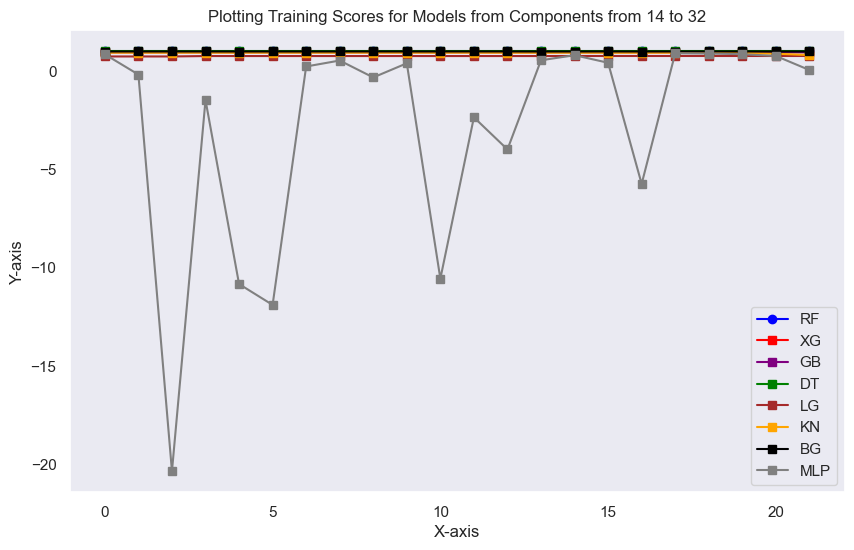

In [ ]:
plt.figure(figsize=(10, 6))

# Plot x1 and x2 on the same graph
plt.plot(randomforest_train, label='RF', marker='o', linestyle='-', color='blue')
plt.plot(xgboost_train, label='XG', marker='s', linestyle='-', color='red')
plt.plot(gradientboost_train, label='GB', marker='s', linestyle='-', color='purple')
plt.plot(decisiontree_train, label='DT', marker='s', linestyle='-', color='green')
plt.plot(linearreg_train, label='LG', marker='s', linestyle='-', color='brown')
plt.plot(knn_train, label='KN', marker='s', linestyle='-', color='orange')
plt.plot(bag_train, label='BG', marker='s', linestyle='-', color='black')
plt.plot(mlp_train, label='MLP', marker='s', linestyle='-', color='grey')

# Add labels, title, and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Training Scores for Models from Components from 14 to 32')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [ ]:
print(randomforest_train)
print(xgboost_train)
print(gradientboost_train)
print(decisiontree_train)
print(linearreg_train)
print(knn_train)
print(bag_train)
print(mlp_train)

[0.9905187478302329, 0.9907973302272641, 0.9902284650181961, 0.9910465343258867, 0.9911912192488646, 0.9907784524541358, 0.9909960001732869, 0.9905222614566386, 0.9901283234829074, 0.9909470803868387, 0.9910019980790149, 0.9908943934170679, 0.991526215971317, 0.9909355235104294, 0.99109114733151, 0.9913103401676749, 0.9914565129424977, 0.99148945473759, 0.9913889563940601, 0.991430236730692, 0.9914350379165023, 0.9912942214807425]
[0.9760014069706094, 0.9752764465993343, 0.9753830469249223, 0.9768813174797791, 0.9767040101943247, 0.9764577890302478, 0.9764577890302478, 0.9764577890302478, 0.9761196104025833, 0.9769225844773386, 0.9779902524103202, 0.9775392998049057, 0.9774079143379604, 0.9774775176907745, 0.9777973220645415, 0.9777481029725358, 0.9778372772918971, 0.9774103040211466, 0.9783226377192495, 0.978716137275564, 0.978493338726824, 0.9792823324545581]
[0.9398475458686019, 0.9398475458686018, 0.9398475458686019, 0.9417973750584476, 0.9417973750584476, 0.9417973750584476, 0.941

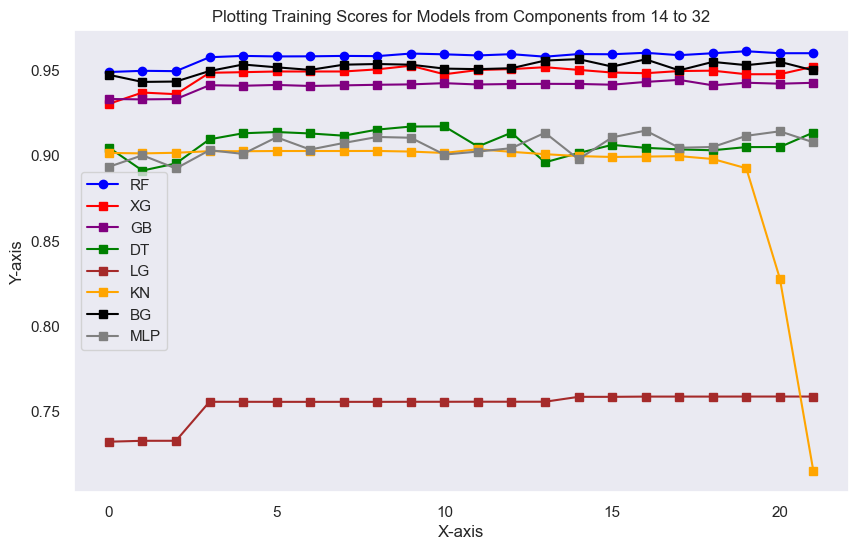

In [ ]:
plt.figure(figsize=(10, 6))


# Plot x1 and x2 on the same graph
plt.plot(randomforest_test, label='RF', marker='o', linestyle='-', color='blue')
plt.plot(xgboost_test, label='XG', marker='s', linestyle='-', color='red')
plt.plot(gradientboost_test, label='GB', marker='s', linestyle='-', color='purple')
plt.plot(decisiontree_test, label='DT', marker='s', linestyle='-', color='green')
plt.plot(linearreg_test, label='LG', marker='s', linestyle='-', color='brown')
plt.plot(knn_test, label='KN', marker='s', linestyle='-', color='orange')
plt.plot(bag_test, label='BG', marker='s', linestyle='-', color='black')
plt.plot(mlp_test, label='MLP', marker='s', linestyle='-', color='grey')

# Add labels, title, and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Training Scores for Models from Components from 14 to 32')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [ ]:
print(randomforest_test)
print(xgboost_test)
print(gradientboost_test)
print(decisiontree_test)
print(linearreg_test)
print(knn_test)
print(bag_test)
print(mlp_test)

[0.9490525628529228, 0.9497612898828506, 0.9495582228179721, 0.9577145376342286, 0.9584989324966142, 0.9581908568311541, 0.9582570971414353, 0.9584913721681174, 0.9583698481893432, 0.9598719728134989, 0.9594323071821408, 0.9587745670233662, 0.9595132923138117, 0.9580387211915191, 0.9595752775700874, 0.9594617454965074, 0.9603175358639318, 0.9589265346948831, 0.9600556423436579, 0.9612252045100292, 0.9600725297216092, 0.960076451846503]
[0.9303820177667868, 0.9370225226594204, 0.9360654566116389, 0.9486000973997866, 0.9489610570668962, 0.9493625350933067, 0.9493625350933067, 0.9493625350933067, 0.9506122554911839, 0.9527438203360737, 0.9477320497992203, 0.9502386827527124, 0.9507729852183582, 0.9518638347863677, 0.950305837701602, 0.9487614176230922, 0.948349881896441, 0.9496267671342972, 0.9498435293234638, 0.9477524936797733, 0.947761949878778, 0.9522144145075697]
[0.9332460263564325, 0.9330152430776778, 0.9331972038290437, 0.9413166286978863, 0.9410037853997308, 0.9414741202774309, 0

In [ ]:
print(randomforest_test.index(max(randomforest_test))+14)
print(xgboost_test.index(max(xgboost_test))+14)
print(gradientboost_test.index(max(gradientboost_test))+14)
print(decisiontree_test.index(max(decisiontree_test))+14)
print(linearreg_test.index(max(linearreg_test))+14)
print(knn_test.index(max(knn_test))+14)
print(bag_test.index(max(bag_test))+14)
print(mlp_test.index(max(mlp_test))+14)

33
23
31
24
34
25
28
30


In [ ]:
print(randomforest_test[randomforest_test.index(max(randomforest_test))])
print(xgboost_test[xgboost_test.index(max(xgboost_test))])
print(gradientboost_test[gradientboost_test.index(max(gradientboost_test))])
print(decisiontree_test[decisiontree_test.index(max(decisiontree_test))])
print(linearreg_test[linearreg_test.index(max(linearreg_test))])
print(knn_test[knn_test.index(max(knn_test))])
print(bag_test[bag_test.index(max(bag_test))])
print(mlp_test[mlp_test.index(max(mlp_test))])

0.9612252045100292
0.9527438203360737
0.944434949442381
0.917188821974216
0.7588513636120888
0.903792888818576
0.9566098973371105
0.9147176961567318


In [ ]:
n_components = 33
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)
top_feature_indices = pca.components_.argsort(axis=1)[:, ::-1][:, :n_components]
print(top_feature_indices)

X_train = X_train.iloc[:, top_feature_indices[0]]
X_val = X_val.iloc[:, top_feature_indices[0]]

[[ 2 25 14 ...  8 19 21]
 [16  6 35 ...  9 10 15]
 [14 16 21 ...  2 25 24]
 ...
 [27 34  3 ... 23 30 26]
 [ 6 15 29 ... 10  8  9]
 [16  5 15 ... 10  8 12]]


In [ ]:
// Node class for a linked list
class Node {
public:
    int data;         // Data of the node
    Node* next;       // Pointer to the next node in the list
    // Constructor for a node with both data and next node provided
    Node(int data1, Node* next1) {
        data = data1;
        next = next1;
    }
    // Constructor for a node with only data provided, next initialized to nullptr
    Node(int data1) {
        data = data1;
        next = nullptr;
    }
};
// Function to print the linked list starting from the given head
void printLL(Node* head) {
    while (head != NULL) {
        cout << head->data << " ";
        head = head->next;
    }
}
// Function to delete the tail node of a linked list and return the new head
Node* deleteTail(Node* head) {
    // If the list is empty or has only one node, return NULL
    if (head == NULL || head->next == NULL)
        return NULL;
    // Initialize a temporary pointer to traverse the list
    Node* temp = head;
    // Traverse to the second last node in the list
    while (temp->next->next != NULL) {
        temp = temp->next;
    }
    // Delete the last node
    delete temp->next;
    // Set the next of the second last node to nullptr, effectively removing the last node
    temp->next = nullptr;
    // Return the head of the modified list
    return head;
}

Node* deleteTail(Node* head){
    if(head==NULL || head->next==NULL)
      return NULL;

    Node* temp = head;
    while(temp->next->next!=NULL){
        if(temp->next->next==NULL){
            Node* junk = temp->next;
            temp->next=nullptr;
            delete junk;
        }
        else{
            temp=temp->next;
        }
    }

}

int main() {
    // Initialize a vector with values for the linked list
    vector<int> arr = {12, 5, 8, 7};
    // Create a linked list with the values from the vector
    Node* head = new Node(arr[0]);
    head->next = new Node(arr[1]);
    head->next->next = new Node(arr[2]);
    head->next->next->next = new Node(arr[3]);
    // Call the deleteTail function to delete the last node
    head = deleteTail(head);
    // Print the linked list after deletion
    printLL(head);
}

In [ ]:
X_train.head()

trip_distance     speed   duration       misc  tip_amount  \
143961           7.79  0.220160  35.383333  11.706385    7.956385   
170292           0.79  0.050318  15.700000   8.276785    2.276785   
161029           0.29  0.055769   5.200000  -2.437302    1.062698   
84006            0.60  0.008852  67.783333   9.444217    2.444217   
95628            1.90  0.078675  24.150000  13.663920    5.163920   

        tolls_amount  payment_type  drop_shift  pick_shift  Airport_fee  ...  \
143961           0.0           1.0           4           3         1.75  ...   
170292           0.0           1.0           3           3         0.00  ...   
161029           0.0           4.0           3           3         0.00  ...   
84006            0.0           1.0           3           3         0.00  ...   
95628            0.0           1.0           2           2         0.00  ...   

        week  passenger_count  pu_cycle  loc_check  congestion_surcharge  \
143961     2              1.0         3         -1                   0.0   
170292     1              1.0         4         -1                   2.5   
161029     3              1.0         4          1                  -2.5   
84006      2              1.0         2          1                   2.5   
95628      1              1.0         2         -1                   2.5   

        do_cycle  ext_check  extra  pick_hour  drop_hour  
143961         3          1    1.0         23          0  
170292         4          1    2.5         19         18  
161029         4          0    0.0         21         21  
84006          3          1    3.5         20         21  
95628          1          1    5.0         17         17  

[5 rows x 33 columns]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140000 entries, 143961 to 121958
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trip_distance          140000 non-null  float64
 1   speed                  140000 non-null  float64
 2   duration               140000 non-null  float64
 3   misc                   140000 non-null  float64
 4   tip_amount             140000 non-null  float64
 5   tolls_amount           140000 non-null  float64
 6   payment_type           140000 non-null  float64
 7   drop_shift             140000 non-null  int64  
 8   pick_shift             140000 non-null  int64  
 9   Airport_fee            140000 non-null  float64
 10  tolls_check            140000 non-null  int64  
 11  RatecodeID             140000 non-null  float64
 12  airp_check             140000 non-null  int64  
 13  VendorID               140000 non-null  int64  
 14  sp_check               140000 n

In [ ]:
X_val.head()

trip_distance     speed   duration       misc  tip_amount  \
148789           1.50  0.029742  50.433333  15.033210    6.533210   
169618           3.80  0.452381   8.400000  17.687048    9.187048   
131258           1.89  0.068686  27.516667  12.793777    6.793777   
31864            1.10  0.536585   2.050000   8.195121    3.695121   
11032            2.84  0.041898  67.783333  13.838753    7.838753   

        tolls_amount  payment_type  drop_shift  pick_shift  Airport_fee  ...  \
148789           0.0           1.0           3           2          0.0  ...   
169618           0.0           1.0           3           3          0.0  ...   
131258           0.0           1.0           3           3          0.0  ...   
31864            0.0           1.0           3           3          0.0  ...   
11032            0.0           1.0           2           3          0.0  ...   

        week  passenger_count  pu_cycle  loc_check  congestion_surcharge  \
148789     1              1.0         4          1                   2.5   
169618     2              1.0         1          1                   2.5   
131258     3              2.0         1          1                   2.5   
31864      3              1.0         1          1                   2.5   
11032      1              2.0         4         -1                   2.5   

        do_cycle  ext_check  extra  pick_hour  drop_hour  
148789         4          1    5.0         17         18  
169618         3          1    5.0         19         19  
131258         2          1    2.5         18         18  
31864          2          1    1.0         22         22  
11032          2          1    2.5         18         17  

[5 rows x 33 columns]

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 148789 to 22870
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_distance          35000 non-null  float64
 1   speed                  35000 non-null  float64
 2   duration               35000 non-null  float64
 3   misc                   35000 non-null  float64
 4   tip_amount             35000 non-null  float64
 5   tolls_amount           35000 non-null  float64
 6   payment_type           35000 non-null  float64
 7   drop_shift             35000 non-null  int64  
 8   pick_shift             35000 non-null  int64  
 9   Airport_fee            35000 non-null  float64
 10  tolls_check            35000 non-null  int64  
 11  RatecodeID             35000 non-null  float64
 12  airp_check             35000 non-null  int64  
 13  VendorID               35000 non-null  int64  
 14  sp_check               35000 non-null  int64  
 1

## PIPELINE

In [ ]:
num_scale_col = ['trip_distance',
                'extra',
                'tip_amount',
                'tolls_amount',
                'improvement_surcharge',
                'congestion_surcharge',
                'Airport_fee',
                'duration',
                'misc']

In [ ]:
print(new_num_col_names)

['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'duration', 'misc', 'locdiff', 'week', 'day', 'pick_hour', 'pick_shift', 'drop_hour', 'drop_shift', 'pu_cycle', 'do_cycle', 'speed', 'passn_check', 'tripd_check', 'sp_check', 'dur_check', 'ext_check', 'tip_check', 'tolls_check', 'airp_check', 'misc_check', 'loc_check']


In [ ]:
left_out_elements = list(set(new_num_col_names) - set(num_scale_col))
print(left_out_elements)

['airp_check', 'passenger_count', 'drop_hour', 'loc_check', 'tolls_check', 'dur_check', 'ext_check', 'pick_hour', 'tripd_check', 'pu_cycle', 'day', 'week', 'tip_check', 'PULocationID', 'sp_check', 'VendorID', 'do_cycle', 'drop_shift', 'passn_check', 'DOLocationID', 'misc_check', 'pick_shift', 'speed', 'RatecodeID', 'locdiff']


In [ ]:
class PCAU:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        self.top_feature_indices = None

    def fit(self, X):
        # Fit PCA and get the top feature indices
        pca = PCA(n_components=self.n_components)
        X_new = pca.fit_transform(X)
        top_feature_indices = pca.components_.argsort(axis=1)[:, ::-1][:, :self.n_components]

        # Save relevant information
        self.top_feature_indices = top_feature_indices
        self.components_ = X[:, top_feature_indices[0]]
        return self

    def transform(self, X, categorical_cols=None, passthrough_cols=None):
        # Apply transformation using the top feature indices
        self.components_ = X[:, self.top_feature_indices[0]]
        return self.components_

    def fit_transform(self, X, categorical_cols=None, passthrough_cols=None):
        # Fit PCA and get the top feature indices
        pca = PCA(n_components=self.n_components)
        X_new = pca.fit_transform(X)
        top_feature_indices = pca.components_.argsort(axis=1)[:, ::-1][:, :self.n_components]

        self.components_ = X[:, top_feature_indices[0]]
        # Save relevant information
        self.top_feature_indices = top_feature_indices
        return self.components_


In [ ]:
# Define the categorical columns to be encoded
categorical_cols = new_cat_col_names

# Define the numeric columns (if any)
numeric_cols = ['trip_distance',
                'extra',
                'tip_amount',
                'tolls_amount',
                'improvement_surcharge',
                'congestion_surcharge',
                'Airport_fee',
                'duration',
                'misc']

# Create transformers for encoding and scaling
categorical_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

# Create a ColumnTransformer to apply transformations to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols),
        ('passthrough', 'passthrough', left_out_elements)  # Add your specific numeric columns here
    ])

# Create the final pipeline with PCA and a regressor (you can use a classifier for classification)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCAU(n_components=33))  # Set the desired number of components
])

# Fit the pipeline on your data
X_train = pipeline.fit_transform(X_train_pipe)
X_val = pipeline.transform(X_val_pipe)


[[35 30 14 ... 11 21 26]
 [35 13 18 ...  1 33 27]
 [33  1 15 ... 17 18 13]
 ...
 [ 2  4 10 ... 19  1  6]
 [10 35 24 ... 11  3 25]
 [24 35  4 ...  2 23 11]]


In [ ]:
X_train = pd.DataFrame(X_train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       140000 non-null  float64
 1   1       140000 non-null  float64
 2   2       140000 non-null  float64
 3   3       140000 non-null  float64
 4   4       140000 non-null  float64
 5   5       140000 non-null  float64
 6   6       140000 non-null  float64
 7   7       140000 non-null  float64
 8   8       140000 non-null  float64
 9   9       140000 non-null  float64
 10  10      140000 non-null  float64
 11  11      140000 non-null  float64
 12  12      140000 non-null  float64
 13  13      140000 non-null  float64
 14  14      140000 non-null  float64
 15  15      140000 non-null  float64
 16  16      140000 non-null  float64
 17  17      140000 non-null  float64
 18  18      140000 non-null  float64
 19  19      140000 non-null  float64
 20  20      140000 non-null  float64
 21  21      14

In [ ]:
X_val = pd.DataFrame(X_val)
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       35000 non-null  float64
 1   1       35000 non-null  float64
 2   2       35000 non-null  float64
 3   3       35000 non-null  float64
 4   4       35000 non-null  float64
 5   5       35000 non-null  float64
 6   6       35000 non-null  float64
 7   7       35000 non-null  float64
 8   8       35000 non-null  float64
 9   9       35000 non-null  float64
 10  10      35000 non-null  float64
 11  11      35000 non-null  float64
 12  12      35000 non-null  float64
 13  13      35000 non-null  float64
 14  14      35000 non-null  float64
 15  15      35000 non-null  float64
 16  16      35000 non-null  float64
 17  17      35000 non-null  float64
 18  18      35000 non-null  float64
 19  19      35000 non-null  float64
 20  20      35000 non-null  float64
 21  21      35000 non-null  float64
 22

In [ ]:
X_train.head()

0      1    2    3         4     5     6    7    8    9   ...   23   24  \
0  -7.0  174.0 -1.0  3.0  0.220160  23.0   0.0  4.0  3.0  1.0  ...  0.5  1.0   
1 -24.0  226.0 -1.0  4.0  0.050318  19.0  18.0  3.0  3.0  1.0  ...  1.0  1.0   
2  15.0  251.0  1.0  4.0  0.055769  21.0  21.0  3.0  3.0  0.0  ...  0.0  0.0   
3  83.0  166.0  1.0  3.0  0.008852  20.0  21.0  3.0  3.0  1.0  ...  1.0  1.0   
4 -35.0   35.0 -1.0  1.0  0.078675  17.0  17.0  2.0  2.0  1.0  ...  1.0  1.0   

    25   26   27   28   29   30   31   32  
0  1.0  1.0  1.0  0.0  1.0  1.0  3.0  1.0  
1  1.0  1.0  0.5  0.0  1.0  0.0  2.0  1.0  
2  4.0 -1.0  0.5  0.0  2.0  0.0  4.0  1.0  
3  1.0  1.0  0.5  0.0  1.0  0.0  3.0  0.0  
4  1.0  1.0  0.5  0.0  1.0  0.0  2.0  0.0  

[5 rows x 33 columns]

In [ ]:
for numb in range(1,10):
    if numb == 1:
        regressor = RandomForestRegressor()
        print('Model: Random Forest')
    elif numb == 2:
        regressor = XGBRegressor()
        print('Model: XGBoost')
    elif numb == 3:
        regressor = GradientBoostingRegressor()
        print('Model: Gradient Boosting')
    elif numb == 4:
        regressor = DecisionTreeRegressor()
        print('Model: Decision Tree')
    elif numb == 5:
        regressor = LinearRegression()
        print('Model: Linear Regressor')
    elif numb == 6:
        regressor = KNeighborsRegressor()
        print('Model: KNN')
    elif numb == 7:
        regressor = AdaBoostRegressor()
        print('Model: Ada-Boost')
    elif numb == 8:
        regressor = BaggingRegressor()
        print('Model: Bagging')
    elif numb == 9:
        regressor = MLPRegressor()
        print('Model: Multi Layer Percerptron')
    regressor.fit(X_train,y_train)
    print(regressor.score(X_train,y_train))
    print(regressor.score(X_val,y_val))


Model: Random Forest
0.9825835342455781
0.8876026478917252
Model: XGBoost
0.9567774368241968
0.9034621123593701
Model: Gradient Boosting
0.8436352067207844
0.8409834615331598
Model: Decision Tree
1.0
0.7535248939335231
Model: Linear Regressor
0.7590374372940757
0.7588384040383362
Model: KNN


KeyboardInterrupt: ignored

## VALIDATION

In [ ]:
def k_fold(x_data, y_data, numb):
    # Load the dataset
    X, y = x_data, y_data

    # Initialize the regressor
    if numb == 1:
        regressor = RandomForestRegressor()
        print('Model: Random Forest')
    elif numb == 2:
        regressor = XGBRegressor()
        print('Model: XGBoost')
    elif numb == 3:
        regressor = GradientBoostingRegressor()
        print('Model: Gradient Boosting')
    elif numb == 4:
        regressor = DecisionTreeRegressor()
        print('Model: Decision Tree')
    elif numb == 5:
        regressor = LinearRegression()
        print('Model: Linear Regressor')
    elif numb == 6:
        regressor = KNeighborsRegressor()
        print('Model: KNN')
    elif numb == 7:
        regressor = AdaBoostRegressor()
        print('Model: Ada-Boost')
    elif numb == 8:
        regressor = BaggingRegressor()
        print('Model: Bagging')
    elif numb == 9:
        regressor = MLPRegressor()
        print('Model: Multi Layer Percerptron')

    # Define the number of folds
    k = 10

    # Initialize lists to store the evaluation metrics
    mse_scores = []
    rmse_scores = []
    r2_scores = []
    mae_scores = []

    # Perform k-fold cross-validation
    kf = KFold(n_splits=k, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train your regressor on the training data
        regressor.fit(X_train, y_train)

        # Evaluate the regressor on the test data
        y_pred = regressor.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)         # Calculate Mean Squared Error (MSE)
        rmse = np.sqrt(mse)                              # Calculate Root Mean Square Deviation (RMSE)
        r2 = r2_score(y_test, y_pred)                    # Calculate Coefficient of Determination (R2)
        mae = mean_absolute_error(y_test, y_pred)        # Calculate Mean Absolute Error (MAE)

        # Store the evaluation metrics
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        mae_scores.append(mae)

    # Calculate the average evaluation metrics
    avg_mse = sum(mse_scores) / len(mse_scores)
    avg_rmse = sum(rmse_scores) / len(rmse_scores)
    avg_r2 = sum(r2_scores) / len(r2_scores)
    avg_mae = sum(mae_scores) / len(mae_scores)

    # Print the average evaluation metrics
    print("Average Mean Squared Error (MSE):", avg_mse)
    print("Average Root Mean Square Deviation (RMSE):", avg_rmse)
    print("Average Coefficient of Determination (R2):", avg_r2)
    print("Average Mean Absolute Error (MAE):", avg_mae)
    results = [avg_mse, avg_rmse, avg_r2, avg_mae]
    return results

for i in range(1,10):
    X_train_num = X_train.to_numpy()
    y_train_num = y_train.to_numpy()
    results = k_fold(X_train_num, y_train_num, i)

    if i == 1:
        randomforest_eval = results
    elif i == 2:
        xgboost_eval = results
    elif i == 3:
        gradientboost_eval = results
    elif i == 4:
        decisiontree_eval = results
    elif i == 5:
        linearreg_eval = results
    elif i == 6:
        knn_eval = results
    elif i == 7:
        ada_eval = results
    elif i == 8:
        bag_eval = results
    elif i == 9:
        mlp_eval = results

Model: Random Forest
Average Mean Squared Error (MSE): 40.239149399274574
Average Root Mean Square Deviation (RMSE): 6.287002169611773
Average Coefficient of Determination (R2): 0.9378870656350559
Average Mean Absolute Error (MAE): 2.657388067142857
Model: XGBoost
Average Mean Squared Error (MSE): 45.90787609679289
Average Root Mean Square Deviation (RMSE): 6.710076043194261
Average Coefficient of Determination (R2): 0.929166376737312
Average Mean Absolute Error (MAE): 2.6738822248299465
Model: Gradient Boosting
Average Mean Squared Error (MSE): 46.454908627238325
Average Root Mean Square Deviation (RMSE): 6.760760596550763
Average Coefficient of Determination (R2): 0.9285057636464821
Average Mean Absolute Error (MAE): 3.0096041654630916
Model: Decision Tree
Average Mean Squared Error (MSE): 72.460678355
Average Root Mean Square Deviation (RMSE): 8.437510184269533
Average Coefficient of Determination (R2): 0.8879043512844174
Average Mean Absolute Error (MAE): 3.7018252142857144
Model: 

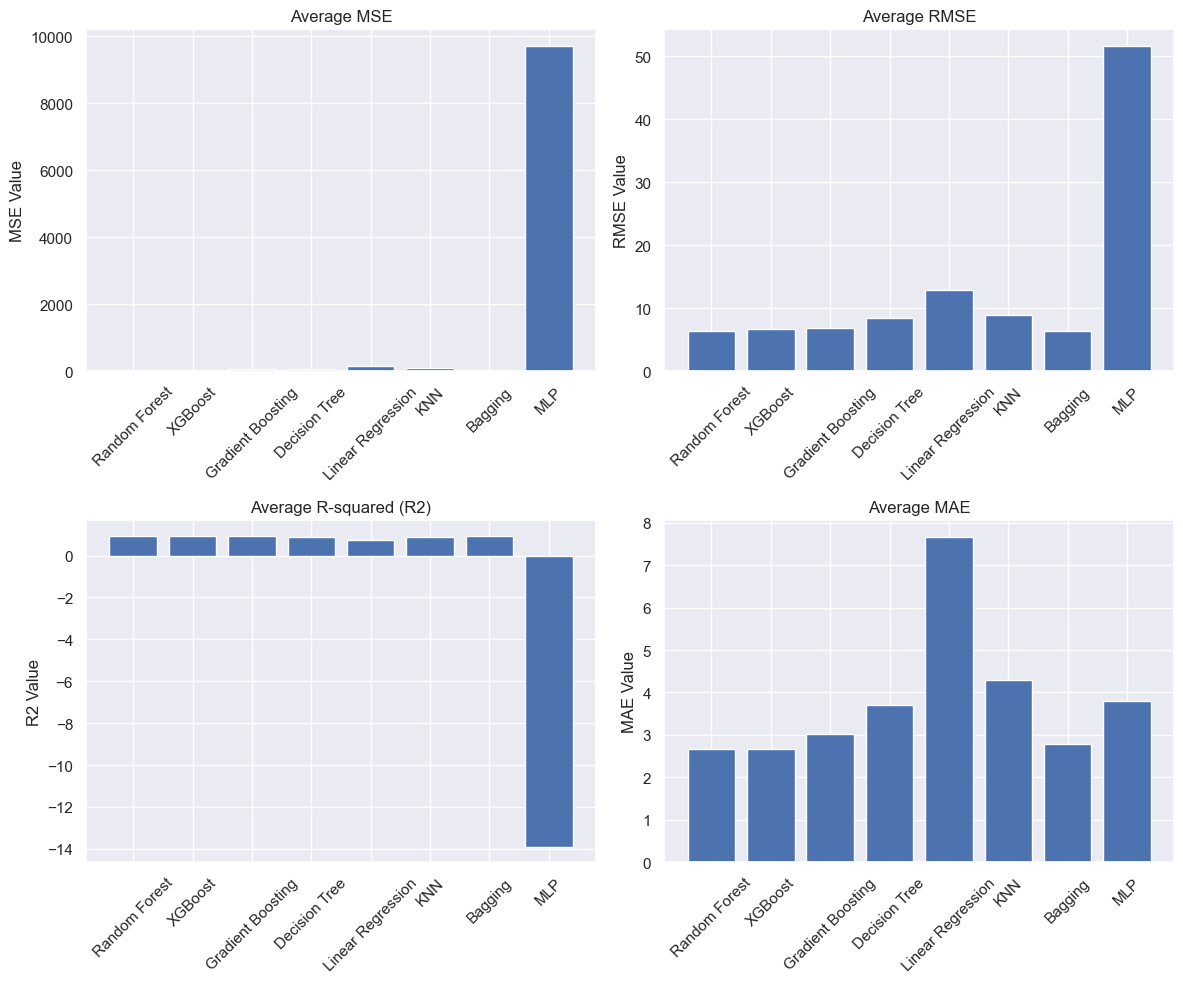

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the evaluation results stored in the following lists
avg_mse_values = [randomforest_eval[0], xgboost_eval[0], gradientboost_eval[0], decisiontree_eval[0], linearreg_eval[0], knn_eval[0], bag_eval[0], mlp_eval[0]]
avg_rmse_values = [randomforest_eval[1], xgboost_eval[1], gradientboost_eval[1], decisiontree_eval[1], linearreg_eval[1], knn_eval[1], bag_eval[1], mlp_eval[1]]
avg_r2_values = [randomforest_eval[2], xgboost_eval[2], gradientboost_eval[2], decisiontree_eval[2], linearreg_eval[2], knn_eval[2], bag_eval[2], mlp_eval[2]]
avg_mae_values = [randomforest_eval[3], xgboost_eval[3], gradientboost_eval[3], decisiontree_eval[3], linearreg_eval[3], knn_eval[3], bag_eval[3], mlp_eval[3]]

# List of model names for labels
model_names = ["Random Forest", "XGBoost", "Gradient Boosting", "Decision Tree", "Linear Regression", "KNN", "Bagging", "MLP"]

# Create four subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot avg_mse
axs[0, 0].bar(model_names, avg_mse_values)
axs[0, 0].set_title("Average MSE")
axs[0, 0].set_ylabel("MSE Value")

# Plot avg_rmse
axs[0, 1].bar(model_names, avg_rmse_values)
axs[0, 1].set_title("Average RMSE")
axs[0, 1].set_ylabel("RMSE Value")

# Plot avg_r2
axs[1, 0].bar(model_names, avg_r2_values)
axs[1, 0].set_title("Average R-squared (R2)")
axs[1, 0].set_ylabel("R2 Value")

# Plot avg_mae
axs[1, 1].bar(model_names, avg_mae_values)
axs[1, 1].set_title("Average MAE")
axs[1, 1].set_ylabel("MAE Value")

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## HYPER-PARAMETER TUNING

In [ ]:
model_hypertuning = []

### GRADIENT BOOSTING

In [ ]:
param_grid = {
    'n_estimators': [30, 50, 70],  # Adjust the number of boosting rounds (trees)
    'max_depth': [3, 4, 5, 6],  # Adjust the maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Adjust the learning rate
}

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Create the Grid Search Cross-Validation object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, n_jobs=1, scoring='r2')

# Fit the Grid Search on the transformed training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the Grid Search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(X_val)

# Print the best parameters
print("Best Parameters:", best_params)

best_estimator.score(X_val,y_val)
model_hypertuning.append(best_estimator.score(X_val,y_val))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 70}


0.9603164112478668

### XGBOOST

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [30, 50, 70],  # Adjust the number of boosting rounds (trees)
    'max_depth': [3, 4, 5, 6],  # Adjust the maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Adjust the learning rate
}

# Create an XGBoost Regressor
xgb_regressor = XGBRegressor()

# Create the Grid Search Cross-Validation object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, n_jobs=1, scoring='r2')

# Fit the Grid Search on the transformed training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the Grid Search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(X_val)

# Print the best parameters
print("Best Parameters:", best_params)

best_estimator.score(X_val,y_val)
model_hypertuning.append(best_estimator.score(X_val,y_val))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 70}


0.9469046714122226

### RANDOM FOREST

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [30, 50, 70],  # Adjust the number of trees
    'max_depth': [None, 30, 40, 50],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Adjust the minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Adjust the minimum samples required in a leaf node
}
# param_grid= {
#     'n_estimators': [100,200,300,400],
#     'max_depth': [1,3,5,7],
#     'criterion': ['squared_error', 'poisson']
# }

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Create the Grid Search Cross-Validation object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=1, scoring='r2')

# Fit the Grid Search on the transformed training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the Grid Search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(X_val)

# Print the best parameters
print("Best Parameters:", best_params)

best_estimator.score(X_val,y_val)
model_hypertuning.append(best_estimator.score(X_val,y_val))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 70}
0.9593164112478668


## SAVE MODEL

In [ ]:
# with open('model.pkl', 'wb') as file:
#     pickle.dump(dr, file)

## TEST DATA

In [ ]:
test_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
test_data.head()

In [ ]:
test_data.columns

In [ ]:
test_data.describe()

In [ ]:
test_data.info()

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data[test_data['passenger_count'] == 0]

## TEST DATA: FEATURE ENGINEERING

In [ ]:
test_data= test_data.replace(np.nan,method='ffill')

                                ########################

test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'])
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'])

test_data['RatecodeID'] = test_data['RatecodeID'].apply(lambda x: 1 if x == 99 else x)
test_data['duration'] = abs((test_data['tpep_dropoff_datetime'] - test_data['tpep_pickup_datetime']))
test_data['duration'] = test_data['duration'].dt.total_seconds().div(60).astype(float)
test_data['misc'] = test_data['tip_amount'] + test_data['tolls_amount'] + test_data['extra'] + test_data['Airport_fee'] + test_data['improvement_surcharge'] + test_data['congestion_surcharge']
test_data['locdiff'] = (test_data['DOLocationID'] - (test_data['PULocationID']))

                                ########################

test_data['week'] = test_data['tpep_pickup_datetime'].dt.dayofweek
conditions = [
    (test_data['week'] == 2),  # Tuesday
    (test_data['week'] == 3),  # Wednesday
    (test_data['week'] == 4),  # Thursday
    (test_data['week'] == 5)   # Friday
]
values = [1, 2, 3, 4]
test_data['week'] = np.select(conditions, values, default=5)

                                ########################

test_data['day'] = test_data['tpep_pickup_datetime'].dt.day
conditions = [
    (test_data['day'] == 1),
    (test_data['day'] == 28),
    (test_data['day'] == 29),
    (test_data['day'] == 30)
]
values = [1, 2, 3, 4]
test_data['day'] = np.select(conditions, values, default=5)

                                ########################

test_data['pick_hour'] = test_data['tpep_pickup_datetime'].dt.hour
conditions = [
    (test_data['pick_hour'] >= 6) & (test_data['pick_hour'] < 12),
    (test_data['pick_hour'] >= 12) & (test_data['pick_hour'] < 18),
    (test_data['pick_hour'] >= 18) & (test_data['pick_hour'] < 24),
    (test_data['pick_hour'] >= 0) & (test_data['pick_hour'] < 6)
]
values = [1, 2, 3, 4]
test_data['pick_shift'] = np.select(conditions, values, default=5)

test_data['drop_hour'] = test_data['tpep_dropoff_datetime'].dt.hour
conditions = [
    (test_data['drop_hour'] >= 6) & (test_data['drop_hour'] < 12),
    (test_data['drop_hour'] >= 12) & (test_data['drop_hour'] < 18),
    (test_data['drop_hour'] >= 18) & (test_data['drop_hour'] < 24),
    (test_data['drop_hour'] >= 0) & (test_data['drop_hour'] < 6)
]
values = [1, 2, 3, 4]
test_data['drop_shift'] = np.select(conditions, values, default=5)

                                ########################
conditions = [
    (test_data['PULocationID'] >= 1) & (test_data['PULocationID'] < 66),
    (test_data['PULocationID'] >= 66) & (test_data['PULocationID'] < 132),
    (test_data['PULocationID'] >= 132) & (test_data['PULocationID'] < 198),
    (test_data['PULocationID'] >= 198) & (test_data['PULocationID'] <= 264)
]
values = [1, 2, 3, 4]
test_data['pu_cycle'] = np.select(conditions, values, default=5)
conditions = [
    (test_data['DOLocationID'] >= 1) & (test_data['DOLocationID'] < 66),
    (test_data['DOLocationID'] >= 66) & (test_data['DOLocationID'] < 132),
    (test_data['DOLocationID'] >= 132) & (test_data['DOLocationID'] < 198),
    (test_data['DOLocationID'] >= 198) & (test_data['DOLocationID'] <= 264)
]
values = [1, 2, 3, 4]
test_data['do_cycle'] = np.select(conditions, values, default=5)

                                ########################

test_data['speed'] = test_data.apply(lambda row: 0 if row['duration'] == 0 else row['trip_distance'] / row['duration'], axis=1)

                                ########################

test_data['passn_check'] = test_data['passenger_count'].apply(lambda x: 0 if x == 0 else 1)
test_data['tripd_check'] = test_data['trip_distance'].apply(lambda x: 0 if x == 0 else 1)
test_data['sp_check'] = test_data['speed'].apply(lambda x: 0 if x == 0 else 1)
test_data['dur_check'] = test_data['duration'].apply(lambda x: 0 if x == 0 else 1)
test_data['ext_check'] = test_data['extra'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['tip_check'] = test_data['tip_amount'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['tolls_check'] = test_data['tolls_amount'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['airp_check'] = test_data['Airport_fee'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['misc_check'] = test_data['misc'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['loc_check'] = test_data['locdiff'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)

                                ########################

test_data= test_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'],axis=1) # no use now
# test_data= test_data.drop(['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'],axis=1) # misc takes of it


In [ ]:
print(test_data['VendorID'].value_counts())
print(" ")
print(test_data['passenger_count'].value_counts())
print(" ")
print(test_data['RatecodeID'].value_counts())
print(" ")
print(test_data['store_and_fwd_flag'].value_counts())
print(" ")
print(test_data['payment_type'].value_counts())
print(" ")
print(test_data['improvement_surcharge'].value_counts())
print(" ")
print(test_data['congestion_surcharge'].value_counts())
print(" ")
print(test_data['week'].value_counts())
print(" ")
print(test_data['day'].value_counts())
print(" ")
print(test_data['pick_shift'].value_counts())
print(" ")
print(test_data['drop_shift'].value_counts())
print(" ")
print(test_data['passn_check'].value_counts())
print(" ")
print(test_data['tripd_check'].value_counts())
print(" ")
print(test_data['sp_check'].value_counts())
print(" ")
print(test_data['dur_check'].value_counts())
print(" ")
print(test_data['loc_check'].value_counts())
print(" ")
print(test_data['pu_cycle'].value_counts())
print(" ")
print(test_data['do_cycle'].value_counts())

In [ ]:
sns.set()
data.hist(bins=50,figsize=(15,15))
plt.show()

In [ ]:
X_train.columns, test_data.columns

## TEST DATA: NON PIPELINE & TRANSFORM

In [ ]:
test_data[['store_and_fwd_flag','payment_type']]= oe.transform(test_data[['store_and_fwd_flag','payment_type']])
# CATEGORICAL VALUE TO NUMERICAL

In [ ]:
test_data = test_data.iloc[:, top_feature_indices[0]]
# BEST 29 PCA COMPONENTS

## TEST DATA: PIPELINE & TRANSFORM

In [ ]:
test_data = pipeline.transform(test_data)

In [ ]:
# output = dr.predict(test_data)
output = best_estimator.predict(test_data)

In [ ]:
X_train.columns, test_data.columns

In [ ]:
test_data[:5]

In [ ]:
X_train.shape, test_data.shape

## TEST DATA: SUBMISSION.CSV

In [ ]:
output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})

In [ ]:
output

In [ ]:
output.to_csv("submission.csv", index=False)

In [ ]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import pandas as pd

In [ ]:
data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
train_y.shape

(60000,)

In [ ]:
test_X.shape

(10000, 28, 28)

In [ ]:
test_y.shape

(10000,)

In [ ]:
print(28*28)

784


In [ ]:
train_X = train_X.reshape(60000,784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(10000, 28, 28)

In [ ]:
y_train = y_train.reshape(10000,784)

In [ ]:
X_val.shape

(60000,)

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score

In [ ]:
model = svm.SVC(kernel = 'poly', degree = 3, decision_function_shape='ovr', class_weight='balanced',  C=10)

In [ ]:
model.fit(train_X, train_y)


In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCAU(n_components=33))  # Set the desired number of components
])

# Fit the pipeline on your data
X_train = pipeline.fit_transform(X_train_pipe)
X_val = pipeline.transform(X_val_pipe)